### About the Dataset
#### Kaggle dataset : [Download The Dataset Here ](https://www.kaggle.com/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/discussion/310030)

#### Description
This dataset contains 1.2M distinct tweets about the current ongoing Ukraine-Russia conflict.

Implementation
Two Jupyter notebooks running 24/7, executing every 15 mins monitoring hashtags pertaining to the ongoing Ukraine-Russia conflict. The dataset creator also implemented a simple "hashtag crawler" where the dataset creator crawled the top-most hashtags from an initial set of hashtags thus getting the other related hashtags at a given point in time.

#### Import dependencies

In [50]:
import pandas as pd
import numpy as np
import re
import datetime as dt
pd.set_option('display.max_colwidth', None)

### Import all csv files for all dates and combine to get consolidated csv

In [51]:
import glob

path = r'resources/archive'
all_files = glob.glob(path + '/*.csv')

consolidated = []

for file in all_files:
    df = pd.read_csv(file, index_col = None)
    consolidated.append(df)

all_tweets_consolidated = pd.concat(consolidated, axis=0, ignore_index=True)

/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/1789386630.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col = None)
/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/1789386630.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col = None)
/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/1789386630.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col = None)
/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/1789386630.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col = None)
/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/1789386630.py:9: DtypeWarning: 

### Quick Exploration of Data

In [52]:
all_tweets_consolidated.shape

(11052722, 18)

### Drop Duplicates

In [53]:
all_tweets_consolidated.drop_duplicates(['tweetid'],inplace=True)

In [15]:
all_tweets_consolidated.shape

(10727386, 18)

In [27]:
# save the above dataframe as a csv
all_tweets_consolidated.to_csv('Datasets_Final_Project/all_tweets_consolidated.csv', index=False)

#### Load the csv dataset into a dataframe

In [4]:
tweets_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')

/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_65950/3556057717.py:1: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')


#### Create a data set of English tweets

In [5]:
# Filter English laguage tweets from the data (relevant to this project)
en_tweets_df =  tweets_df[tweets_df['language']=='en']
len(en_tweets_df)

7113869

### Data Cleaning

In [6]:
# Drop rows where location is NaN or blank
en_tweets_df['location'].isna().sum()
en_tweets_df = en_tweets_df[en_tweets_df['location'].notna()]

In [7]:
len(en_tweets_df)

4233850

In [536]:
# create a csv of english tweets where location is not null
en_tweets_df.to_csv('en_tweets.csv', index=False)

### Drop the columns that are not required

In [8]:
# Drop all unnecessary columns: userid, username, acctdesc, usercreatedts, language, favorite_count, extractedts, coordinates
tweets_df = en_tweets_df[['tweetcreatedts','text','location','hashtags','retweetcount','favorite_count']]
tweets_df.head(2)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count
1,2022-03-08 00:01:12,"""Kyiv Ghost"" shot down the #Russian Caliber cr...",Olympia WA,"[{'text': 'Russian', 'indices': [45, 53]}, {'t...",32.0,0.0
2,2022-03-08 00:01:12,#China wants to mediate the #Ukraine war to re...,Georgia,"[{'text': 'China', 'indices': [18, 24]}, {'tex...",79.0,0.0


### Create Country column in the dataframe based on location column

In [64]:
# create country column based on location column
# Following function compares the dictionary values with strings in location column,
# to find 
#def country_col(df):
country_dicts = [{'usa':['united states','u.s.a','United States of America','Louisiana','san francisco','nyc','Philadelphia','Los Angeles','Portland','colorado','miami','brooklyn','dallas','atlanta','austin','san diego','Las Vegas','chicago','boston','new york','houston','texas','Florida','Seattle','Washington DC']},
               {'india':['india','New Delhi','Bharat','Mumbai','Hyderabad','Bengaluru','Kolkata','Chennai','Bangalore','Delhi','भारत','Pune']},
               {'ukraine':['Kyiv','Дніпро','ukraine','Kharkiv','Odessa','Donetsk','Харків','Україна','Kiev Ukraine','Киев','Київ']},
               {'uk':['england','London','United Kingdom','Liverpool','scotland','Lviv']},
               {'belarus':['belarus','minsk','miensk','беларусь','Светлогорск','Минск','Свободная','жыве','Берасце']},
               {'slovakia':['slovakia','Banska Stiavnica','Trencin','košice','Zilina','Kosice','Bratislava','Žilina','Slovensko','slovenská']},
               {'moldova':['moldova','Chisinau','Chişinău']},
               {'georgia':['georgia','Géorgie','Batumi','საქართველო','Tbilissi','Zugdidi','Samegrelo','sakartvelo','Fitzgerald']},
               {'spain':['España','spain','Madrid','Barcelona','El Castanar']},
               {'kazakhstan':['kazakhstan','Shymkent','Astana','Nur-Sultan','Almaty','Qazaqstan','Karagandy','turkistan']},
               {'canada':['canada','Ontario','Toronto','Vancouver','Québec','Alberta']},
               {'mexico':['México','Mexico','Guanajuato','Ciudad de México']},
               {'lebanon':['Lebanon']},
               {'malta':['malta']},
               {'syria':['Syria']},
               {'yemen':['Yemen']},
               {'hungary':['budapest','hungary','Heves County','Nyársapát','Pécs','Szombathely','Debrecen','Szeged','Bács-Kiskun County','Magyarország','Gyöngyös']},
               {'argentina':['Buenos Aires','Argentina']},
               {'taiwan':['Taipei City','taiwan']},
               {'luxembourg':['Luxembourg']},
               {'brasil':['Brasil','São Paulo','Brazil']},
               {'ghana':['Accra','ghana','Kumasi']},
               {'chile':['Chile']},
               {'denmark':['Denmark','København']},
               {'switzerland':['Switzerland','Geneva','Zürich','Schweiz']},
               {'norway':['Norway','Oslo']},
               {'france':['france','Paris','Strasbourg','Marseille']},
               {'ireland':['Ireland','Dublin City']},
               {'netherland':['Nederland','netherland','netherlands','holland','Amsterdam']},
               {'portugal':['Portugal','Lisboa','Porto','Lisbon']},
               {'singapore':['Singapore']},
               {'germany':['Deutschland','germany','berlin','Hamburg','Bayern','München']},
               {'austria':['Österreich','wien','austria','Vienna']},
               {'finland':['finland','Helsinki','Jyväskylä','Iivisniemi','Lappeenranta','Häme','Suomi','Kauniainen','Sastamala','Lahti','Kotka']},
               {'romania':['Romania','Bucharest','roma','România','Bucureşti','rome']},
               {'greece':['Greece','Athens','Attiki','Αττική','Ελλάς']},
               {'sweden':['sweden','Stockholm','Sverige','Gothenburg']},
               {'italy':['italy','italia','Milano','Lombardia']},
               {'belgium':['belgium','brussels','Belgique','Bruxelles','België']},
               {'czechia':['Prague','Czechia','Czech Republic','Praha','Česká republika']},
               {'venezuela':['Venezuela']},
               {'phillipines':['Philippines']},
               {'thailand':['bangkok','thailand','ประเทศไทย','กรุงเทพมหานคร, ประเทศไทย']},
               {'malaysia':['Malaysia']},
               {'japan':['tokyo','japan']},
               {'indonesia':['Indonesia']},
               {'latvia':['Latvia','Riga','Latvija']},
               {'ethiopia':['Ethiopia']},
               {'estonia':['Estonia','Tallinn']},
               {'nigeria':['Nigeria','Lagos','Abuja']},
               {'south africa':['South Africa','Johannesburg','Cape Town','Pretoria']},
               {'kenya':['kenya','nairobi']},
               {'turkey':['turkey','istanbul','Türkiye']},
               {'lithuania':['Lithuania','Vilnius']},
               {'uae':['Dubai','United Arab Emirates']},
               {'israel':['Israel','Jerusalem']},
               {'iran':['جمهوری اسلامی ایران','Islamic Republic of Iran']},
               {'pakistan':['pakistan']},
               {'bangladesh':['Bangladesh','dhaka']},
               {'russia':['russia','Россия']},
               {'poland':['poland','polska','Warsaw','Krakow','lodz','wroclaw','poznan','gdansk','Warszawa']},
               {'china':['China', '俄罗斯','俄羅斯','Hong Kong','Beijing']},
               {'australia':['australia', 'sydney','Melbourne','Vienna','Queensland','Brisbane','Canberra']},
               {'nz':['new zealand','Auckland']}]


def find_country(location,country_dicts):   
    for country_dict in country_dicts:
        for country_name,city_list in country_dict.items():
            for city_name in city_list:
                condition = city_name.lower() in location.lower()
                if city_name.lower() in location.lower():
                    return country_name
    return np.nan


tweets_df['country'] = tweets_df['location'].apply(lambda x: find_country(x, country_dicts))

### Drop nan values and clean the country column

In [65]:
# Create a new dataframe where country column is not na
tweets_df = tweets_df[tweets_df['country'].notna()]
tweets_df.shape

(2103692, 7)

In [66]:
tweets_df['country'].value_counts()

usa           393736
uk            298239
india         212396
canada        147466
ukraine       137551
               ...  
slovakia         235
belarus          110
moldova           59
georgia           24
kazakhstan        14
Name: country, Length: 64, dtype: int64

### Reset the index of the dataframe

In [67]:
# reset index of the new df
tweets_df.reset_index(drop=True,inplace=True)
tweets_df.tail(2)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country
2103690,2022-03-11,if you see that there are people who volunteer who want to come and help people who live in we have to help them to do that we should help them to move to the conflict zone to defence minister,"London, England","[{'text': 'Donbass', 'indices': [106, 114]}]",27.0,0.0,uk
2103691,2022-03-11,and now israel is in the picture to understand the present crisis we need to study history geopolitics cultural relativism foreign relations foreign policies to know where this crisis may lead us we need to study the book of revelation,"Manila, Philippines","[{'text': 'RussiaUkraineWar', 'indices': [254, 271]}, {'text': 'israel', 'indices': [272, 279]}]",0.0,0.0,phillipines


### Clean Date column by formatting the date

In [68]:
# clean the date column by changing the date format to date object
tweets_df['tweetcreatedts'] = pd.to_datetime(tweets_df['tweetcreatedts']).dt.date
tweets_df.tail(2)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country
2103690,2022-03-11,if you see that there are people who volunteer who want to come and help people who live in we have to help them to do that we should help them to move to the conflict zone to defence minister,"London, England","[{'text': 'Donbass', 'indices': [106, 114]}]",27.0,0.0,uk
2103691,2022-03-11,and now israel is in the picture to understand the present crisis we need to study history geopolitics cultural relativism foreign relations foreign policies to know where this crisis may lead us we need to study the book of revelation,"Manila, Philippines","[{'text': 'RussiaUkraineWar', 'indices': [254, 271]}, {'text': 'israel', 'indices': [272, 279]}]",0.0,0.0,phillipines


### Let us clean tweets using a function which will perform following operations :

- convert all text to lowercase
- remove mentions
- remove hashtags
- remove hyperlinks
- remove punctuations and special characters 


In [69]:
import re

def text_cleaning(df, column_name):

# convert all text to lower case
    df[column_name] = df[column_name].str.lower().to_frame() # returns a series object
    df[column_name] = df[column_name].str.replace(r"@[A-Za-z0-9_']+","", regex = True).to_frame() # remove mentions
    df[column_name] = df[column_name].str.replace(r"#[A-Za-z0-9_]+","", regex=True).to_frame() # remove hashtags
    df[column_name] = df[column_name].str.replace(r"http\S+|www.\S+","",regex=True).to_frame() # remove hyperlinks
    df[column_name] = df[column_name].str.replace(r"[^\w\s]|_|\d+|amp|[^a-zA-Z]"," ",regex=True).to_frame() # remove punctuations

    return df

#### Cleaned tweets df preview

In [70]:
# clean the tweets using function
cleaned_tweets_df = text_cleaning(tweets_df,'text')
cleaned_tweets_df.tail(2)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country
2103690,2022-03-11,if you see that there are people who volunteer who want to come and help people who live in we have to help them to do that we should help them to move to the conflict zone to defence minister,"London, England","[{'text': 'Donbass', 'indices': [106, 114]}]",27.0,0.0,uk
2103691,2022-03-11,and now israel is in the picture to understand the present crisis we need to study history geopolitics cultural relativism foreign relations foreign policies to know where this crisis may lead us we need to study the book of revelation,"Manila, Philippines","[{'text': 'RussiaUkraineWar', 'indices': [254, 271]}, {'text': 'israel', 'indices': [272, 279]}]",0.0,0.0,phillipines


### Data Cleaning Complete


#### NOTE: (Add to final report)

- News Tweets are about 1% of the entire dataset and hence assumed to not affect the analysis results. 

- Also, it is difficult to distinguish between the actual news tweets and private accounts sharing news.

### Vader Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] 

In [71]:
# Import dependencies, modules required for sentiment analysis from vader package which is 
# Previously installed in the python environment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [72]:
# Generate sentiment for all the sentnces present in the data set
def sentiment_scores(df, column_name):
    sentiment_score_list=[]
    for row in df[column_name]:
        vader_sentiment = analyzer.polarity_scores(row)
        sentiment_score_list.append(vader_sentiment)
    return pd.DataFrame(sentiment_score_list)
    
# Let us create sentiment dataframe for tweets using above function
sentiments_df = sentiment_scores(cleaned_tweets_df,'text')
sentiments_df.tail(10)

,neg,neu,pos,compound
2103682,0.155,0.743,0.101,-0.3818
2103683,0.257,0.563,0.180,-0.6815
2103684,0.155,0.743,0.101,-0.3818
2103685,0.155,0.743,0.101,-0.3818
2103686,0.192,0.808,0.000,-0.7845
2103687,0.000,1.000,0.000,0.0000
2103688,0.000,0.858,0.142,0.6808
2103689,0.268,0.732,0.000,-0.8470
2103690,0.049,0.722,0.229,0.7579
2103691,0.191,0.809,0.000,-0.8743


In [73]:
# Concatenate tweets and sentiment scores into a new dataframe
tweet_sentiments_df = pd.concat([cleaned_tweets_df,sentiments_df],axis=1)

In [74]:
#tweet_sentiments_df = pd.concat([cleaned_tweets_df.reset_index(drop=True),sentiments_df],axis=1)
tweet_sentiments_df.head(3)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country,neg,neu,pos,compound
0,2022-03-08,a fox s tale for,Orkney Scotland,"[{'text': 'Ukraine', 'indices': [19, 27]}]",0.0,0.0,uk,0.0,1.0,0.0,0.0
1,2022-03-08,ukraine,"Hyères, France","[{'text': 'Ukraine', 'indices': [11, 19]}, {'text': 'Zelensky', 'indices': [20, 29]}, {'text': 'Putin', 'indices': [34, 40]}, {'text': 'WarCrimes', 'indices': [41, 51]}, {'text': 'Russia', 'indices': [58, 65]}]",0.0,0.0,france,0.0,1.0,0.0,0.0
2,2022-03-08,russia s enlargement redlines cable from written by director william j burns then us ambassador to moscow link,"Essonne, Ile-de-France","[{'text': 'NATO', 'indices': [25, 30]}, {'text': 'Ukraine', 'indices': [55, 63]}, {'text': 'CIA', 'indices': [91, 95]}]",1377.0,0.0,france,0.0,1.0,0.0,0.0


In [76]:
# check the data distribution using describe function
tweet_sentiments_df[['compound']].describe()

,compound
count,2.103692e+06
mean,-6.698872e-02
std,5.278712e-01
min,-9.977000e-01
25%,-5.267000e-01
50%,0.000000e+00
75%,3.818000e-01
max,9.961000e-01


In [124]:
# convert scores into positive, neutral, negative 

# create a list of conditions
conditions = [
              (tweet_sentiments_df['compound'] < -0.3),
              (tweet_sentiments_df['compound'] >= -0.3) &(tweet_sentiments_df['compound'] < 0.3),
              (tweet_sentiments_df['compound'] >= 0.3)
              ]

# create a list of values corresponding with each condition -1 for negative, 0 neutral and 1 positive
values = ['negative','neutral','positive']


tweet_sentiments_df['sentiment'] = np.select(conditions, values)
tweet_sentiments_df.head()

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country,neg,neu,pos,compound,sentiment
0,2022-03-08,a fox s tale for,Orkney Scotland,"[{'text': 'Ukraine', 'indices': [19, 27]}]",0.0,0.0,uk,0.00,1.000,0.000,0.0000,neutral
1,2022-03-08,ukraine,"Hyères, France","[{'text': 'Ukraine', 'indices': [11, 19]}, {'text': 'Zelensky', 'indices': [20, 29]}, {'text': 'Putin', 'indices': [34, 40]}, {'text': 'WarCrimes', 'indices': [41, 51]}, {'text': 'Russia', 'indices': [58, 65]}]",0.0,0.0,france,0.00,1.000,0.000,0.0000,neutral
2,2022-03-08,russia s enlargement redlines cable from written by director william j burns then us ambassador to moscow link,"Essonne, Ile-de-France","[{'text': 'NATO', 'indices': [25, 30]}, {'text': 'Ukraine', 'indices': [55, 63]}, {'text': 'CIA', 'indices': [91, 95]}]",1377.0,0.0,france,0.00,1.000,0.000,0.0000,neutral
3,2022-03-08,can t help but think that hm queen is quietly saying it with flowers,Australia,"[{'text': 'Ukraine️', 'indices': [89, 98]}]",34.0,0.0,australia,0.00,0.875,0.125,0.2144,neutral
4,2022-03-08,another invading general killed by freedom fighters,"Hyères, France","[{'text': 'Russian', 'indices': [36, 44]}, {'text': 'Ukraine', 'indices': [63, 71]}]",2.0,0.0,france,0.41,0.288,0.302,-0.1280,neutral


In [125]:
tweet_sentiments_df['sentiment'].value_counts()

negative    770308
neutral     746784
positive    586600
Name: sentiment, dtype: int64

<AxesSubplot:>

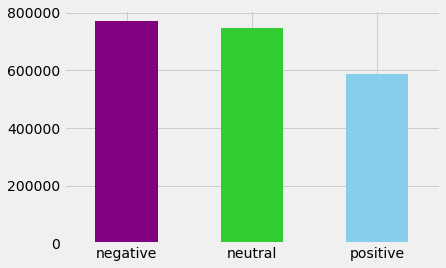

In [126]:
# import dependencies for visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Vizualization
results = tweet_sentiments_df['sentiment'].value_counts()
results.plot(kind='bar',rot=0,color=['purple','limegreen','skyblue'])

### Saving the Data into various forms for further analysis:

### Save the cleaned_tweets_df dataframe as csv data set

In [38]:
cleaned_tweets_df.to_csv('Datasets_Final_Project/cleaned_tweets_with_additional_countries.csv', index=False)

### Save the tweet_sentiments_df dataframe as csv data set

In [103]:
# save the above dataframe as a csv
tweet_sentiments_df.to_csv('Datasets_Final_Project/tweet_sentiments_with_additional_countries_equal_bins.csv', index=False)

### Save the  cleaned_tweets_df dataframe as sqlite data set

In [554]:
#import sqlite3
#conn = sqlite3.connect('Datasets_Final_Project/cleaned_tweets.sqlite')
#cleaned_tweets_df.to_sql(name='cleaned_tweets', con=conn)
#conn.close()

### Save the tweet_sentiments_df dataframe as sqlite data set

In [ ]:
import sqlite3
conn = sqlite3.connect('Datasets_Final_Project/tweet_sentiments_df.sqlite')
tweet_sentiments_df.to_sql(name='tweet_sentiments',con=conn)
conn.close()

### Save the cleaned_tweets_df dataframe as json data set

In [320]:
cleaned_tweets_df.to_json('Datasets_Final_Project/cleaned_tweets.json')

### Save the tweet_sentiments_df dataframe as json data set

In [321]:
tweet_sentiments_df.to_json('Datasets_Final_Project/tweet_sentiments.json')